In [4]:
import os
import shutil
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- CONFIGURATION ---
BASE_DIR = '/kaggle/input/brain-stroke-prediction-ct-scan-image-dataset/Brain_Stroke_CT-SCAN_image'
OUTPUT_DIR = '/kaggle/working/reduced_dataset_resized'
IMAGE_SIZE = (128, 128)
N_TRAIN = 756
N_VAL = 78
N_TEST = 130
VISUAL_SAMPLES = 40  # for PCA and histograms

splits = ['Train', 'Validation', 'Test']
classes = ['Stroke', 'Normal']
target_counts = {'Train': N_TRAIN, 'Validation': N_VAL, 'Test': N_TEST}

# --- CREATE OUTPUT FOLDERS ---
for split in splits:
    for cls in classes:
        os.makedirs(f"{OUTPUT_DIR}/{split}/{cls}", exist_ok=True)

# --- COPY & RESIZE IMAGES ---
def copy_and_resize_samples(split, cls, target_count):
    src = os.path.join(BASE_DIR, split, cls)
    dst = os.path.join(OUTPUT_DIR, split, cls)

    files = [f for f in os.listdir(src) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    sampled_files = random.sample(files, target_count) if cls == 'Normal' else files

    for fname in sampled_files:
        img = Image.open(os.path.join(src, fname)).convert("RGB")
        img = img.resize(IMAGE_SIZE)
        img.save(os.path.join(dst, fname))

for split in splits:
    for cls in classes:
        copy_and_resize_samples(split, cls, target_counts[split])

# --- LOAD IMAGES FOR VISUALIZATION ---
def load_flattened_images(folder, label, count=VISUAL_SAMPLES):
    images, labels = [], []
    files = [f for f in os.listdir(folder) if f.endswith('.jpg') or f.endswith('.png')]
    for fname in files[:count]:
        img = Image.open(os.path.join(folder, fname)).convert("L").resize(IMAGE_SIZE)
        images.append(np.array(img).flatten())
        labels.append(label)
    return images, labels

stroke_dir = f"{OUTPUT_DIR}/Train/Stroke"
normal_dir = f"{OUTPUT_DIR}/Train/Normal"

stroke_data, stroke_labels = load_flattened_images(stroke_dir, 1)
normal_data, normal_labels = load_flattened_images(normal_dir, 0)

X = np.array(stroke_data + normal_data)
y = np.array(stroke_labels + normal_labels)

# --- PCA PROJECTION (instead of t-SNE) ---
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='red', label='Stroke', alpha=0.6)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c='blue', label='Normal', alpha=0.6)
plt.title("PCA Projection of CT Image Features")
plt.legend()
plt.grid(True)
plt.savefig("/kaggle/working/pca_projection.png")
plt.close()

# --- HISTOGRAMS ---
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(X[y == 1][0], bins=30, color='red')
axs[0].set_title("Stroke Image Histogram")
axs[1].hist(X[y == 0][0], bins=30, color='blue')
axs[1].set_title("Normal Image Histogram")
plt.savefig("/kaggle/working/grayscale_histograms.png")
plt.close()

# --- HEATMAPS ---
stroke_img = Image.open(os.path.join(stroke_dir, os.listdir(stroke_dir)[0])).convert("L")
normal_img = Image.open(os.path.join(normal_dir, os.listdir(normal_dir)[0])).convert("L")

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(stroke_img, cmap='hot')
axs[0].set_title("Stroke Heatmap")
axs[1].imshow(normal_img, cmap='hot')
axs[1].set_title("Normal Heatmap")
[ax.axis('off') for ax in axs]
plt.savefig("/kaggle/working/ct_heatmaps.png")
plt.close()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 1736 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Found 337 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746036134.059200      93 service.cc:148] XLA service 0x79fb9c8acb20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746036134.060228      93 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746036134.060249      93 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746036138.752348      93 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1746036177.569653      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of th

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6178 - loss: 0.8533
Epoch 1: val_loss improved from inf to 1.16308, saving model to inceptionv3_best.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.6194 - loss: 0.8491 - val_accuracy: 0.4527 - val_loss: 1.1631 - learning_rate: 0.0010
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.8588 - loss: 0.2954
Epoch 2: val_loss improved from 1.16308 to 1.06038, saving model to inceptionv3_best.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 349ms/step - accuracy: 0.8592 - loss: 0.2951 - val_accuracy: 0.7114 - val_loss: 1.0604 - learning_rate: 0.0010
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.9164 - loss: 0.2008
Epoch 3: val_loss improved from 1.06038 to 0.58203, saving model to inceptionv3_best.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 365ms/step - accuracy: 0.9166 - loss: 0.2005 - val_accuracy: 0.8259 - val_loss: 0.5820 - learning_rate: 0.0010
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy:

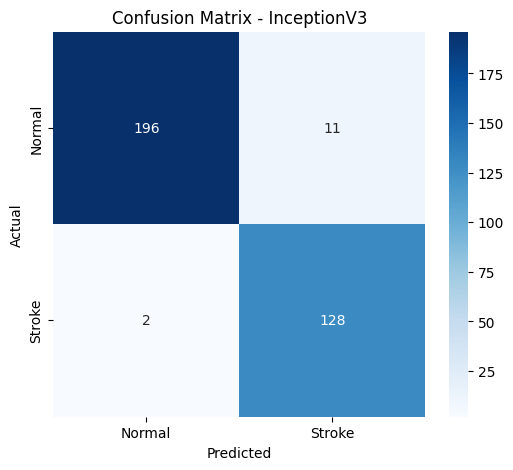

In [4]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Image input shape
input_shape = (224, 224, 3)

# Base InceptionV3 model (without top layer)
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
base_model.trainable = True

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(2, activation='softmax')(x)

# Final model
model_inception = Model(inputs=base_model.input, outputs=output)

# Compile
model_inception.compile(optimizer=Adamax(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint("inceptionv3_best.keras", monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=2)

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory('/kaggle/working/reduced_dataset_resized/Train',
                                              target_size=(224, 224),
                                              batch_size=40,
                                              class_mode='categorical')

val_gen = val_datagen.flow_from_directory('/kaggle/working/reduced_dataset_resized/Validation',
                                          target_size=(224, 224),
                                          batch_size=40,
                                          class_mode='categorical')

test_gen = test_datagen.flow_from_directory('/kaggle/working/reduced_dataset_resized/Test',
                                            target_size=(224, 224),
                                            batch_size=23,  # as per the paper
                                            class_mode='categorical',
                                            shuffle=False)

# Train the model
model_inception.fit(train_gen,
                    epochs=20,
                    validation_data=val_gen,
                    callbacks=[checkpoint, reduce_lr],
                    verbose=1)

# Load best model and predict on test set
best_model = load_model("inceptionv3_best.keras")
y_pred_probs = best_model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

# Confusion matrix and classification report
labels = list(test_gen.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - InceptionV3')
plt.show()


/tmp/ipykernel_31/12616964.py:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 1736 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Found 337 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.6516 - loss: 0.7396
Epoch 1: val_loss improved from inf to 0.71550, saving model to mobilenetv2_best.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 88s 710ms/step - accuracy: 0.6533 - loss: 0.7359 - val_accuracy: 0.6667 - val_loss: 0.7155 - learning_rate: 0.0010
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8956 - loss: 0.2507
Epoch 2: val_loss did not improve from 0.71550
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.8959 - loss: 0.2501 - val_accuracy: 0.6915 - val_loss: 0.8325 - learning_rate: 0.0010
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9547 - loss: 0.1128
Epoch 3: val_loss did not improve from 0.71550

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.9549 - loss: 0.1125 - val_accuracy: 0.5572 - val_loss: 1.5399 - learning_rate: 0.0010
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9771 

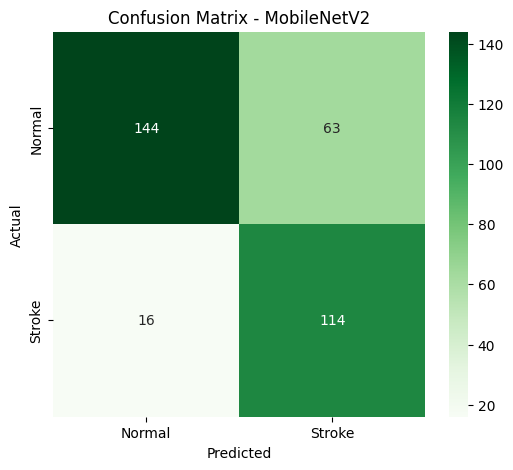

In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Image input shape
input_shape = (224, 224, 3)

# Load base MobileNetV2 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
base_model.trainable = True

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(2, activation='softmax')(x)

# Final model
model_mobilenet = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_mobilenet.compile(optimizer=Adamax(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint("mobilenetv2_best.keras", monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=2)

# Image generators (same as before)
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory('/kaggle/working/reduced_dataset_resized/Train',
                                              target_size=(224, 224),
                                              batch_size=40,
                                              class_mode='categorical')

val_gen = val_datagen.flow_from_directory('/kaggle/working/reduced_dataset_resized/Validation',
                                          target_size=(224, 224),
                                          batch_size=40,
                                          class_mode='categorical')

test_gen = test_datagen.flow_from_directory('/kaggle/working/reduced_dataset_resized/Test',
                                            target_size=(224, 224),
                                            batch_size=23,
                                            class_mode='categorical',
                                            shuffle=False)

# Train the model
model_mobilenet.fit(train_gen,
                    epochs=20,
                    validation_data=val_gen,
                    callbacks=[checkpoint, reduce_lr],
                    verbose=1)

# Load best saved model
best_model = load_model("mobilenetv2_best.keras")

# Predict on test set
y_pred_probs = best_model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

# Evaluation
labels = list(test_gen.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MobileNetV2')
plt.show()


Found 1736 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Found 337 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-04-30 18:14:00.102445: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=0} for conv (f32[40,2048,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[40,1536,7,7]{3,2,1,0}, f32[2048,1536,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-04-30 18:14:00.134023: E external/local_xla/xla/service/

35/44 ━━━━━━━━━━━━━━━━━━━━ 6s 751ms/step - accuracy: 0.6093 - loss: 0.6699

E0000 00:00:1746036905.610607      93 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746036905.765374      93 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746036906.746646      93 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746036906.881966      93 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6185 - loss: 0.6599
Epoch 1: val_loss improved from inf to 2.23381, saving model to xception_best.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6196 - loss: 0.6587 - val_accuracy: 0.6119 - val_loss: 2.2338 - learning_rate: 0.0010
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 771ms/step - accuracy: 0.8361 - loss: 0.3686
Epoch 2: val_loss did not improve from 2.23381
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 798ms/step - accuracy: 0.8368 - loss: 0.3675 - val_accuracy: 0.6119 - val_loss: 2.8393 - learning_rate: 0.0010
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.9214 - loss: 0.1943
Epoch 3: val_loss improved from 2.23381 to 1.56889, saving model to xception_best.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 777ms/step - accuracy: 0.9214 - loss: 0.1941 - val_accuracy: 0.7114 - val_loss: 1.5689 - learning_rate: 0.0010
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.9682 - loss: 0.0828
Epoch 4: val_loss improved 

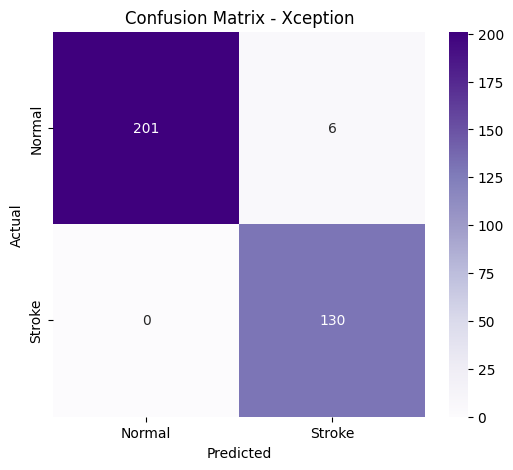

In [6]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Image input shape
input_shape = (224, 224, 3)

# Load base Xception model without top layers
base_model = Xception(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
base_model.trainable = True

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(2, activation='softmax')(x)

# Final model
model_xception = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_xception.compile(optimizer=Adamax(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint("xception_best.keras", monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=2)

# Image generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory('/kaggle/working/reduced_dataset_resized/Train',
                                              target_size=(224, 224),
                                              batch_size=40,
                                              class_mode='categorical')

val_gen = val_datagen.flow_from_directory('/kaggle/working/reduced_dataset_resized/Validation',
                                          target_size=(224, 224),
                                          batch_size=40,
                                          class_mode='categorical')

test_gen = test_datagen.flow_from_directory('/kaggle/working/reduced_dataset_resized/Test',
                                            target_size=(224, 224),
                                            batch_size=23,
                                            class_mode='categorical',
                                            shuffle=False)

# Train the model
model_xception.fit(train_gen,
                   epochs=20,
                   validation_data=val_gen,
                   callbacks=[checkpoint, reduce_lr],
                   verbose=1)

# Load best model and evaluate
best_model = load_model("xception_best.keras")

# Predictions
y_pred_probs = best_model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

# Confusion matrix and classification report
labels = list(test_gen.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Xception')
plt.show()


Found 337 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 820ms/step

Classification Report:

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99       207
      Stroke       0.96      1.00      0.98       130

    accuracy                           0.99       337
   macro avg       0.98      0.99      0.98       337
weighted avg       0.99      0.99      0.99       337



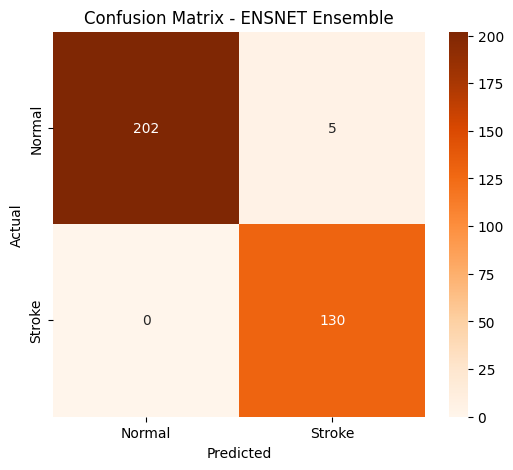

In [7]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Average, Input
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the two best models
model_inception = load_model("inceptionv3_best.keras")
model_xception = load_model("xception_best.keras")

# Freeze the loaded models (optional since they're already trained)
model_inception.trainable = False
model_xception.trainable = False

# Create input layer
input_layer = Input(shape=(224, 224, 3))

# Get predictions from both models
inception_output = model_inception(input_layer)
xception_output = model_xception(input_layer)

# Average their predictions
avg_output = Average()([inception_output, xception_output])

# Create ensemble model
ensnet_model = Model(inputs=input_layer, outputs=avg_output)

# Compile
ensnet_model.compile(optimizer=Adamax(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Use only for evaluation (no training required since we're combining trained models)
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory('/kaggle/working/reduced_dataset_resized/Test',
                                            target_size=(224, 224),
                                            batch_size=23,
                                            class_mode='categorical',
                                            shuffle=False)

# Predict on test set
y_pred_probs = ensnet_model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

# Confusion matrix & classification report
labels = list(test_gen.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ENSNET Ensemble')
plt.show()


Found 1736 images belonging to 2 classes.
Found 337 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training DenseNet121 model...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.6552 - loss: 0.7904 - val_accuracy: 0.4065 - val_loss: 12.0966
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 347ms/step - accuracy: 0.8556 - loss: 0.3436 - val_accuracy: 0.3887 - val_loss: 12.0072
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 334ms/step - accuracy: 0.9015 - loss: 0.2372 - val_accuracy: 0.5134 - val_loss: 3.1097
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 18s 324ms/step - accuracy: 0.9637 - loss: 0.0939 - val_accuracy: 0.8605 - val_loss: 0.5702
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 18s 327ms/step - accuracy: 0.9454 - loss: 0.1435 - val_accuracy: 0.4006 - val_loss: 9.8812
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 333ms/step - accuracy: 0.9795 - loss: 0.0661 - val_accuracy: 0.7982 - val_loss: 0.9348
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 337ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9585 - val_loss: 0.0969
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 333ms/step - accuracy: 0.9616 - loss: 0.0916 - val_accuracy: 0.830

E0000 00:00:1746038377.544714      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746038377.683872      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746038378.138071      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746038378.276017      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


55/55 ━━━━━━━━━━━━━━━━━━━━ 107s 749ms/step - accuracy: 0.7133 - loss: 0.5933 - val_accuracy: 0.3858 - val_loss: 0.7561
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9114 - loss: 0.2171 - val_accuracy: 0.4036 - val_loss: 0.7044
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9667 - loss: 0.0919 - val_accuracy: 0.3858 - val_loss: 0.7739
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9727 - loss: 0.0877 - val_accuracy: 0.3858 - val_loss: 1.0958
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9737 - loss: 0.0810 - val_accuracy: 0.3858 - val_loss: 1.3381
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9704 - loss: 0.0815 - val_accuracy: 0.3858 - val_loss: 1.3901
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9796 - loss: 0.0499 - val_accuracy: 0.3947 - val_loss: 0.9534
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9913 - loss: 0.0398 - val_accuracy: 0.3858 - val_loss:

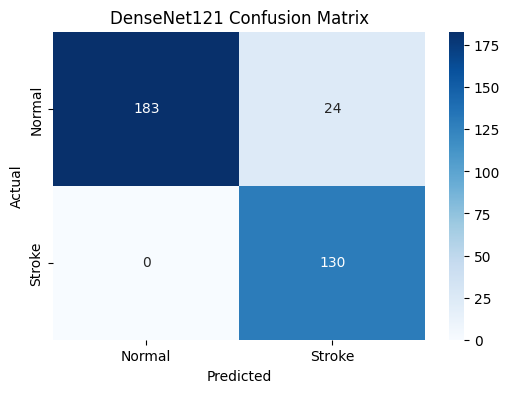

DenseNet121 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.88      0.94       207
      Stroke       0.84      1.00      0.92       130

    accuracy                           0.93       337
   macro avg       0.92      0.94      0.93       337
weighted avg       0.94      0.93      0.93       337

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 472ms/step


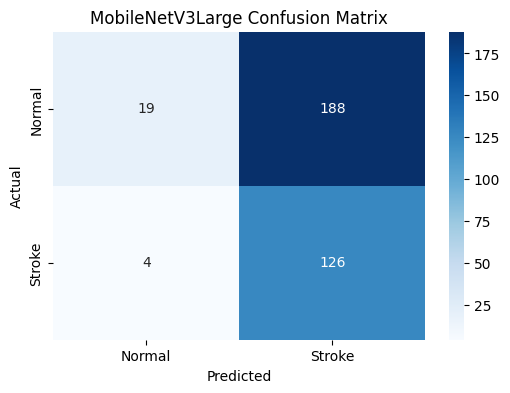

MobileNetV3Large Classification Report:
              precision    recall  f1-score   support

      Normal       0.83      0.09      0.17       207
      Stroke       0.40      0.97      0.57       130

    accuracy                           0.43       337
   macro avg       0.61      0.53      0.37       337
weighted avg       0.66      0.43      0.32       337



In [8]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define image size and batch size
img_height, img_width = 224, 224
batch_size = 32

# Define dataset paths
train_dir = '/kaggle/working/reduced_dataset_resized/Train'
test_dir = '/kaggle/working/reduced_dataset_resized/Test'

# Data generators with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Function to build model
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(2, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=outputs)
    return model

# Build DenseNet121 model
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
model_densenet = build_model(base_model_densenet)

# Build MobileNetV3Large model
base_model_mobilenet = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
model_mobilenet = build_model(base_model_mobilenet)

# Compile models
for model in [model_densenet, model_mobilenet]:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train DenseNet121 model
print("Training DenseNet121 model...")
model_densenet.fit(train_generator, epochs=20, validation_data=test_generator)

# Train MobileNetV3Large model
print("Training MobileNetV3Large model...")
model_mobilenet.fit(train_generator, epochs=20, validation_data=test_generator)

# Function to evaluate model and plot confusion matrix
def evaluate_model(model, test_generator, model_name):
    # Predict
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    class_names = list(test_generator.class_indices.keys())

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Classification report
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred, target_names=class_names))

# Evaluate DenseNet121 model
evaluate_model(model_densenet, test_generator, "DenseNet121")

# Evaluate MobileNetV3Large model
evaluate_model(model_mobilenet, test_generator, "MobileNetV3Large")


In [6]:
'''
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.layers import (
    Input, GlobalAveragePooling2D, GlobalMaxPooling2D,
    Dense, Reshape, Activation, Multiply, Add,
    Conv2D, Concatenate, Lambda, Dropout
)
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clear any previous model from memory
tf.keras.backend.clear_session()

# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Define CBAM block
def cbam_block(feature_map, ratio=8):
    channel = feature_map.shape[-1]

    shared_dense_one = Dense(channel // ratio, activation='relu')
    shared_dense_two = Dense(channel)

    avg_pool = GlobalAveragePooling2D()(feature_map)
    avg_pool = shared_dense_two(shared_dense_one(avg_pool))
    max_pool = GlobalMaxPooling2D()(feature_map)
    max_pool = shared_dense_two(shared_dense_one(max_pool))

    channel_attention = Activation('sigmoid')(Add()([avg_pool, max_pool]))
    channel_attention = Reshape((1, 1, channel))(channel_attention)
    refined = Multiply()([feature_map, channel_attention])

    avg_pool_spatial = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(refined)
    max_pool_spatial = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(refined)
    concat = Concatenate(axis=-1)([avg_pool_spatial, max_pool_spatial])
    spatial_attention = Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')(concat)

    return Multiply()([refined, spatial_attention])

# Build the model
input_tensor = Input(shape=(224, 224, 3))
base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cbam_block(base_model.output)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Paths
train_dir = '/kaggle/working/reduced_dataset_resized/Train'
val_dir = '/kaggle/working/reduced_dataset_resized/Validation'
test_dir = '/kaggle/working/reduced_dataset_resized/Test'

# Image generators
train_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True).flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=8, class_mode='categorical'
)
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=8, class_mode='categorical'
)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=8, class_mode='categorical', shuffle=False
)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

# Evaluate and show classification report
y_prob = model.predict(test_gen)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_gen.classes
labels = list(test_gen.class_indices.keys())

print("\n=== Classification Report ===\n")
print(classification_report(y_true, y_pred, target_names=labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('CBAM + EfficientNetV2S Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
'''

SyntaxError: incomplete input (2511124070.py, line 103)

In [10]:
'''
import tensorflow as tf
from tensorflow.keras.applications import Xception, InceptionV3, DenseNet121
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Separate input for each model to avoid weight-sharing issues
input_shape = (224, 224, 3)
input_xcep = Input(shape=input_shape)
input_incep = Input(shape=input_shape)
input_dense = Input(shape=input_shape)

# Load pre-trained models
xception_base = Xception(weights='imagenet', include_top=False, input_tensor=input_xcep)
inception_base = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_incep)
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_tensor=input_dense)

# Freeze base models initially (optional, can fine-tune later)
for layer in xception_base.layers:
    layer.trainable = False
for layer in inception_base.layers:
    layer.trainable = False
for layer in densenet_base.layers:
    layer.trainable = False

# Feature extraction
xcep_feat = GlobalAveragePooling2D()(xception_base.output)
xcep_feat = BatchNormalization()(xcep_feat)

incep_feat = GlobalAveragePooling2D()(inception_base.output)
incep_feat = BatchNormalization()(incep_feat)

dense_feat = GlobalAveragePooling2D()(densenet_base.output)
dense_feat = BatchNormalization()(dense_feat)

# Feature fusion
merged = Concatenate()([xcep_feat, incep_feat, dense_feat])
merged = Dropout(0.4)(merged)
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.3)(merged)
output = Dense(2, activation='softmax')(merged)

# Final model
model = Model(inputs=[input_xcep, input_incep, input_dense], outputs=output)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
'''

In [25]:
import tensorflow as tf
from tensorflow.keras.applications import Xception, InceptionV3, DenseNet121
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Concatenate, Dense, Dropout, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model

# Define a custom attention layer (Self-Attention)
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, ratio=8):
        super(SelfAttention, self).__init__()
        self.ratio = ratio
    
    def build(self, input_shape):
        self.attention_weights = self.add_weight(
            shape=(input_shape[-1], input_shape[-1] // self.ratio),
            initializer="he_normal",
            trainable=True
        )
        self.attention_bias = self.add_weight(
            shape=(input_shape[-1] // self.ratio,),
            initializer="zeros",
            trainable=True
        )
        
    def call(self, inputs):
        attention_scores = tf.matmul(inputs, self.attention_weights)
        attention_scores = tf.nn.bias_add(attention_scores, self.attention_bias)
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)
        
        output = tf.matmul(attention_weights, inputs)
        return output

# Separate input for each model to avoid weight-sharing issues
input_shape = (224, 224, 3)
input_xcep = Input(shape=input_shape)
input_incep = Input(shape=input_shape)
input_dense = Input(shape=input_shape)

# Load pre-trained models
xception_base = Xception(weights='imagenet', include_top=False, input_tensor=input_xcep)
inception_base = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_incep)
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_tensor=input_dense)

# Freeze base models initially (optional, can fine-tune later)
for layer in xception_base.layers:
    layer.trainable = False
for layer in inception_base.layers:
    layer.trainable = False
for layer in densenet_base.layers:
    layer.trainable = False

# Feature extraction
xcep_feat = GlobalAveragePooling2D()(xception_base.output)
xcep_feat = BatchNormalization()(xcep_feat)

incep_feat = GlobalAveragePooling2D()(inception_base.output)
incep_feat = BatchNormalization()(incep_feat)

dense_feat = GlobalAveragePooling2D()(densenet_base.output)
dense_feat = BatchNormalization()(dense_feat)

# Attention applied to each feature set
xcep_feat_att = SelfAttention()(xcep_feat)
incep_feat_att = SelfAttention()(incep_feat)
dense_feat_att = SelfAttention()(dense_feat)

# Feature fusion
merged = Concatenate()([xcep_feat_att, incep_feat_att, dense_feat_att])

# Learnable fusion layer
merged = Dense(512, activation='relu')(merged)
merged = Dropout(0.4)(merged)
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.3)(merged)

# Output layer
output = Dense(2, activation='softmax')(merged)

# Final model
model = Model(inputs=[input_xcep, input_incep, input_dense], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import Xception, InceptionV3, DenseNet121
from tensorflow.keras.applications.xception import preprocess_input as xcep_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as incep_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as dense_preprocess
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load test images and labels
test_dir = "/kaggle/working/reduced_dataset_resized/Test"
class_map = {"Normal": 0, "Stroke": 1}
image_paths, labels = [], []

for root, dirs, files in os.walk(test_dir):
    for fname in files:
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(root, fname))
            label_name = os.path.basename(root)
            labels.append(class_map[label_name])

# Preprocessing functions
def preprocess_and_extract_features(img_path, model, preprocess_func):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_func(img)
    features = model.predict(img)
    return features.squeeze()

# Load base models for feature extraction
xcep_model = Xception(weights='imagenet', include_top=False, pooling='avg')
incep_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
dense_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Extract features
X_test_xcep = np.array([preprocess_and_extract_features(path, xcep_model, xcep_preprocess) for path in image_paths])
X_test_incep = np.array([preprocess_and_extract_features(path, incep_model, incep_preprocess) for path in image_paths])
X_test_dense = np.array([preprocess_and_extract_features(path, dense_model, dense_preprocess) for path in image_paths])

# Prepare labels
y_test = to_categorical(np.array(labels), num_classes=2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Layer
from tensorflow.keras.models import Model

# Custom Self-Attention Layer (Fixed)
class SelfAttention(Layer):
    def __init__(self, units):
        super(SelfAttention, self).__init__()
        self.Wq = Dense(units)
        self.Wk = Dense(units)
        self.Wv = Dense(units)

    def call(self, inputs):
        q = self.Wq(inputs)
        k = self.Wk(inputs)
        v = self.Wv(inputs)

        score = tf.matmul(q, k, transpose_b=True)  # (batch, units, units)
        attention_weights = tf.nn.softmax(score, axis=-1)
        output = tf.matmul(attention_weights, v)
        return output

# Model input
input_x = Input(shape=(2048,))
input_y = Input(shape=(2048,))
input_z = Input(shape=(1024,))  # DenseNet outputs 1024

# Project all to same shape
x_proj = Dense(256, activation='relu')(input_x)
y_proj = Dense(256, activation='relu')(input_y)
z_proj = Dense(256, activation='relu')(input_z)

# Concatenate the projected outputs along the last axis (axis=1)
merged = Concatenate(axis=1)([x_proj, y_proj, z_proj])  # shape: (batch, 3, 256)

# Apply attention on the merged features
attn_output = SelfAttention(256)(merged)

# Flatten and classify
flat = tf.keras.layers.Flatten()(attn_output)
output = Dense(2, activation='softmax')(flat)

# Create and compile the model
model = Model(inputs=[input_x, input_y, input_z], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Optional: Load pre-trained weights
# model.load_weights("your_model.h5")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


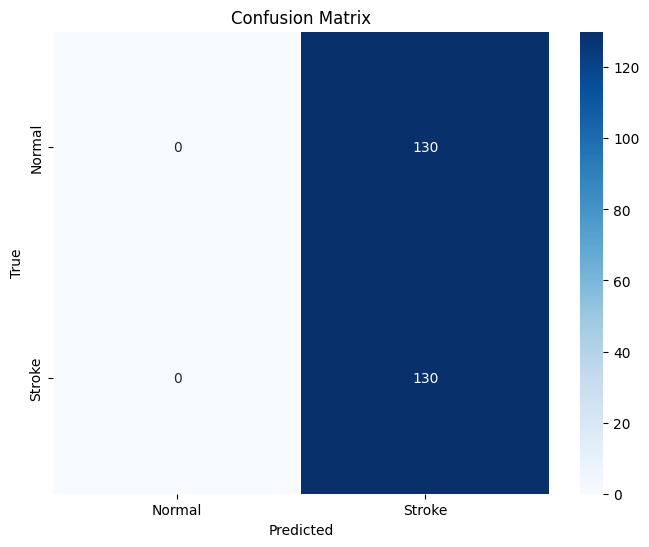

Confusion Matrix:
 [[  0 130]
 [  0 130]]


In [34]:
# Predict
y_pred = model.predict([X_test_xcep, X_test_incep, X_test_dense])
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Normal", "Stroke"], yticklabels=["Normal", "Stroke"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:\n", cm)


In [16]:
import os
from tensorflow.keras.applications import Xception, InceptionV3, DenseNet121
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the test images directory
test_dir = '/kaggle/working/reduced_dataset_resized/Test'

# Preprocessing function for each model
def preprocess_for_xception(img_path):
    img = image.load_img(img_path, target_size=(299, 299))  # Xception input size
    img = image.img_to_array(img)
    img = Xception.preprocess_input(img)  # Xception-specific preprocessing
    return img

def preprocess_for_inception(img_path):
    img = image.load_img(img_path, target_size=(299, 299))  # Inception input size
    img = image.img_to_array(img)
    img = InceptionV3.preprocess_input(img)  # Inception-specific preprocessing
    return img

def preprocess_for_densenet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # DenseNet input size
    img = image.img_to_array(img)
    img = DenseNet121.preprocess_input(img)  # DenseNet-specific preprocessing
    return img

# Get all image file paths in the test directory
image_files = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Apply preprocessing to all test images
X_test_xcep = np.array([preprocess_for_xception(img) for img in image_files])  # For Xception
X_test_incep = np.array([preprocess_for_inception(img) for img in image_files])  # For InceptionV3
X_test_dense = np.array([preprocess_for_densenet(img) for img in image_files])  # For DenseNet121

# Now X_test_xcep, X_test_incep, and X_test_dense contain the preprocessed images for each model.


In [23]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications import Xception, InceptionV3, DenseNet121

# Define paths
test_dir = "/kaggle/working/reduced_dataset_resized/Test"

# List all image file paths in the test folder
image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Preprocessing functions
def preprocess_for_xception(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img = image.img_to_array(img)
    img = Xception.preprocess_input(img)
    return img

def preprocess_for_inception(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img = image.img_to_array(img)
    img = InceptionV3.preprocess_input(img)
    return img

def preprocess_for_densenet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = DenseNet121.preprocess_input(img)
    return img

# Load all test images
X_test_xcep = np.array([preprocess_for_xception(path) for path in image_paths])
X_test_incep = np.array([preprocess_for_inception(path) for path in image_paths])
X_test_dense = np.array([preprocess_for_densenet(path) for path in image_paths])


In [24]:
# Check that all test sets are loaded and non-empty
assert len(X_test_xcep) > 0 and len(X_test_incep) > 0 and len(X_test_dense) > 0, "Test sets are empty!"
assert len(X_test_xcep) == len(X_test_incep) == len(X_test_dense), "Test sets must have the same length!"

# Make predictions
y_pred = model.predict([X_test_xcep, X_test_incep, X_test_dense], verbose=1)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)


AssertionError: Test sets are empty!

In [ ]:
from tensorflow.keras.layers import Layer, Conv2D, Multiply, Add, Activation, GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape
import tensorflow as tf
from tensorflow.keras.layers import Dense, Concatenate

def cbam_block(input_feature, ratio=8):
    channel = input_feature.shape[-1]

    # Shared layers for both max and average pooling
    shared_layer_one = Dense(channel // ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

    # Channel Attention
    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)

    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1, 1, channel))(max_pool)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)

    cbam_feature = Add()([avg_pool, max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)
    cbam_feature = Multiply()([input_feature, cbam_feature])

    # Spatial Attention
    avg_pool = tf.reduce_mean(cbam_feature, axis=-1, keepdims=True)
    max_pool = tf.reduce_max(cbam_feature, axis=-1, keepdims=True)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    cbam_feature = Conv2D(filters=1,
                          kernel_size=7,
                          strides=1,
                          padding='same',
                          activation='sigmoid',
                          kernel_initializer='he_normal',
                          use_bias=False)(concat)
    cbam_feature = Multiply()([cbam_feature, input_feature])  # Apply attention to input_feature

    return cbam_feature


In [ ]:
# Predict on validation data
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_gen.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_gen.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix after CBAM Integration')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Extract features using the model up to the merged_features layer
feature_extractor = Model(inputs=model.input, outputs=merged_features)
X_train_features = feature_extractor.predict(train_gen)
X_val_features = feature_extractor.predict(val_gen)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_features, train_gen.classes)

# Predict on validation features
y_pred = svm_classifier.predict(X_val_features)
y_true = val_gen.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_gen.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix after SVM Classifier Optimization')
plt.show()

# Print classification report
print("\n=== Classification Report after SVM Optimization ===\n")
print(classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))


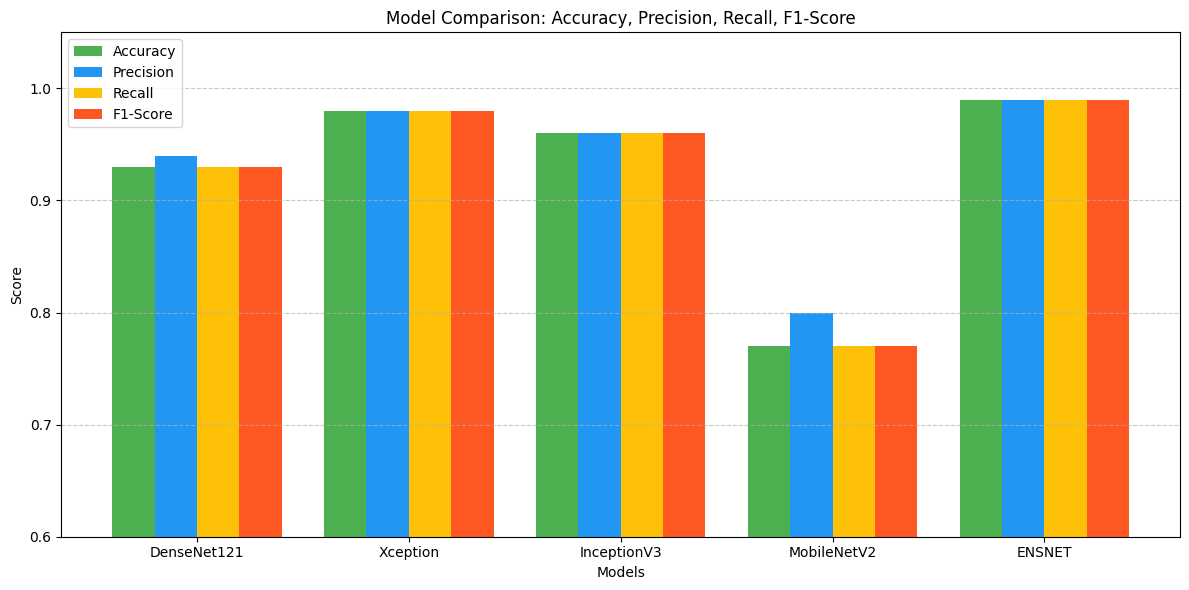

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your reports
models = ['DenseNet121', 'Xception', 'InceptionV3', 'MobileNetV2', 'ENSNET']
accuracy = [0.93, 0.98, 0.96, 0.77, 0.99]
precision = [0.94, 0.98, 0.96, 0.80, 0.99]
recall = [0.93, 0.98, 0.96, 0.77, 0.99]
f1_score = [0.93, 0.98, 0.96, 0.77, 0.99]

# Bar chart parameters
x = np.arange(len(models))
width = 0.2  # width of each bar

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='#4CAF50')
plt.bar(x - 0.5*width, precision, width, label='Precision', color='#2196F3')
plt.bar(x + 0.5*width, recall, width, label='Recall', color='#FFC107')
plt.bar(x + 1.5*width, f1_score, width, label='F1-Score', color='#FF5722')

# Aesthetics
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy, Precision, Recall, F1-Score')
plt.ylim(0.6, 1.05)
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save or Show
plt.savefig('model_comparison_bar_graph.png')  # Save the figure
plt.show()  # Or just show it


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# STEP 1: Predict probabilities
y_score = model.predict(val_gen, steps=val_gen.samples // val_gen.batch_size + 1)

# STEP 2: True binary labels
y_true = val_gen.classes  # shape: (n_samples,)
y_true_bin = label_binarize(y_true, classes=[0, 1])  # shape: (n_samples, 1)

# STEP 3: Use predicted score for class 1 (e.g., Stroke)
fpr, tpr, thresholds = roc_curve(y_true_bin, y_score[:, 1])
roc_auc = auc(fpr, tpr)

# STEP 4: Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


NameError: name 'model' is not defined